In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv(r"C:\Users\santosh nandam\Downloads\salaries.csv")

In [5]:
df

,company,job,degree,salary_more_then_100k,Unnamed: 4
0,google,sales executive,bachelors,0,NaN
1,google,sales executive,masters,0,NaN
2,google,business manager,bachelors,1,NaN
3,google,business manager,masters,1,NaN
4,google,computer programmer,bachelors,0,NaN
5,google,computer programmer,masters,1,NaN
6,abc pharma,sales executive,masters,0,NaN
7,abc pharma,computer programmer,bachelors,0,NaN
8,abc pharma,business manager,bachelors,0,NaN
9,abc pharma,business manager,masters,1,NaN


In [7]:
df.isnull().sum()

company                   0
job                       0
degree                    0
salary_more_then_100k     0
Unnamed: 4               16
dtype: int64

In [9]:
df = df.drop(columns=['Unnamed: 4'], errors='ignore')
df

,company,job,degree,salary_more_then_100k
0,google,sales executive,bachelors,0
1,google,sales executive,masters,0
2,google,business manager,bachelors,1
3,google,business manager,masters,1
4,google,computer programmer,bachelors,0
5,google,computer programmer,masters,1
6,abc pharma,sales executive,masters,0
7,abc pharma,computer programmer,bachelors,0
8,abc pharma,business manager,bachelors,0
9,abc pharma,business manager,masters,1


In [11]:
from sklearn.preprocessing import LabelEncoder

In [12]:
label_encoders = {}
for column in ['company', 'job', 'degree']:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

In [15]:
X = df[['company', 'job', 'degree']]
y = df['salary_more_then_100k']

In [17]:
X

,company,job,degree
0,2,2,0
1,2,2,1
2,2,0,0
3,2,0,1
4,2,1,0
5,2,1,1
6,0,2,1
7,0,1,0
8,0,0,0
9,0,0,1


In [19]:
y

0     0
1     0
2     1
3     1
4     0
5     1
6     0
7     0
8     0
9     1
10    1
11    1
12    1
13    1
14    1
15    1
Name: salary_more_then_100k, dtype: int64

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20, random_state=20)

In [58]:
from sklearn.tree import DecisionTreeClassifier
clf = tree.DecisionTreeClassifier()
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [60]:
y_pred = clf.predict(X_test)
y_pred

array([1, 0, 0, 1], dtype=int64)

In [62]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.75

[Text(0.4444444444444444, 0.875, 'x[0] <= 0.5\ngini = 0.486\nsamples = 12\nvalue = [5, 7]'),
 Text(0.2222222222222222, 0.625, 'x[2] <= 0.5\ngini = 0.375\nsamples = 4\nvalue = [3, 1]'),
 Text(0.1111111111111111, 0.375, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.3333333333333333, 0.375, 'x[1] <= 1.0\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.2222222222222222, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.4444444444444444, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.6666666666666666, 0.625, 'x[0] <= 1.5\ngini = 0.375\nsamples = 8\nvalue = [2, 6]'),
 Text(0.5555555555555556, 0.375, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.7777777777777778, 0.375, 'x[1] <= 0.5\ngini = 0.5\nsamples = 4\nvalue = [2, 2]'),
 Text(0.6666666666666666, 0.125, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.8888888888888888, 0.125, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]')]

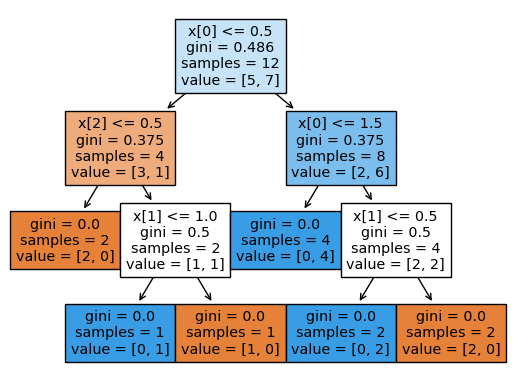

In [68]:
from sklearn import tree
tree.plot_tree(clf,filled=True)